# NLP For Drugs.com Data Set

### Packages Import

In [1]:
### Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.color_palette("Blues", as_cmap=True)

### Standard Packages
import numpy as np
import warnings
import nltk
import re
import pandas as pd
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

### NLTK
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
nltk.download('vader_lexicon')

### Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, \
                            accuracy_score, f1_score, recall_score, precision_score

### ImbLearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/albertcc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/albertcc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pd.set_option("display.max_rows", None)

### Bringing in two .tsv files as test and train

In [3]:
data_test = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')

In [4]:
# Drop first column since these appear to be entry numbers
data_test = data_test.drop(data_test.columns[0],axis=1)

In [5]:
data_test.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.""",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.""",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping that after a few months on this medication, I will develop healthier habits that I can continue without the aid of Contrave.""",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend""",9.0,"October 22, 2015",4


In [6]:
data_train = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [7]:
# Drop the first column as these appear to be just entrie numbers
data_train = data_train.drop(data_train.columns[0],axis=1)

In [8]:
data_train.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     161297 non-null  object 
 1   condition    160398 non-null  object 
 2   review       161297 non-null  object 
 3   rating       161297 non-null  float64
 4   date         161297 non-null  object 
 5   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


- Noticed how 'condition' has some missing values, but other columns are fine

In [10]:
# Drop null values that are in 'condition'

data_train = data_train.dropna(subset=['condition'])

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     160398 non-null  object 
 1   condition    160398 non-null  object 
 2   review       160398 non-null  object 
 3   rating       160398 non-null  float64
 4   date         160398 non-null  object 
 5   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 8.6+ MB


- Reduces the training dataset to 160,398 values

In [12]:
data_train['condition'].value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

### Looking at unique drugs under 'Birth Control' condition

In [13]:
data_train['drugName'][data_train['condition'] =='Birth Control'].nunique()

172

In [44]:
data_train['drugName'][data_train['condition'] =='Birth Control'].value_counts()

Etonogestrel                                               3314
Ethinyl estradiol / norethindrone                          2337
Nexplanon                                                  2149
Levonorgestrel                                             2129
Ethinyl estradiol / levonorgestrel                         1600
Ethinyl estradiol / norgestimate                           1580
Implanon                                                   1095
Mirena                                                      965
Skyla                                                       822
Lo Loestrin Fe                                              667
Ethinyl estradiol / etonogestrel                            631
NuvaRing                                                    620
Copper                                                      607
Drospirenone / ethinyl estradiol                            522
Medroxyprogesterone                                         502
Desogestrel / ethinyl estradiol         

### Group Conditions by Treatment

In [15]:
# Create a new column for which condition based on the lists below

mental_health = ['Depression', 'Anxiety', 'Bipolar Disorde',
                 'ADHD', 'Insomnia']
birth_control = ['Birth Control', 'Emergency Contraception']
physical_conditions = ['Pain', 'Acne']
weight_conditions = ['Weight Loss', 'Obseity']

data_train['groups'] = np.where(data_train['condition'].isin(mental_health), 'Mental Health',
                               np.where(data_train['condition'].isin(birth_control), 'Birth Control',
                                       np.where(data_train['condition'].isin(physical_conditions), 'Physical Conditions',
                                               np.where(data_train['condition'].isin(weight_conditions), 'Weight Conditions',
                                                       'Other'))))

In [16]:
data_train['groups'].value_counts()

Other                  87552
Birth Control          31251
Mental Health          26253
Physical Conditions    11733
Weight Conditions       3609
Name: groups, dtype: int64

In [17]:
data_train.head()

,drugName,condition,review,rating,date,usefulCount,groups
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27,Other
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192,Mental Health
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17,Birth Control
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10,Birth Control
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37,Other


In [18]:
# This drops the rows where 'groups' is equal to 'Other', 
# allowing us to focus on the 4 categories that we created
data_train.drop(data_train[data_train['groups'] == 'Other'].index, inplace = True)

In [19]:
data_train['groups'].value_counts()

Birth Control          31251
Mental Health          26253
Physical Conditions    11733
Weight Conditions       3609
Name: groups, dtype: int64

In [20]:
# Looking to bin these ratings as these will be the target variables
data_train['rating'].value_counts(bins=3)

(7.0, 10.0]    42725
(0.99, 4.0]    18682
(4.0, 7.0]     11439
Name: rating, dtype: int64

In [21]:
# Create new column called 'labels' that will have the target variables
data_train['sentiment'] = ['Positive' if x > 7.0 else 'Neutral' if 4.0 <= x <= 7.0 else 'Negative' for x in data_train['rating']]

In [22]:
data_train.head()

,drugName,condition,review,rating,date,usefulCount,groups,sentiment
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192,Mental Health,Positive
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17,Birth Control,Neutral
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10,Birth Control,Positive
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1.0,"March 7, 2017",5,Birth Control,Negative
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.""",10.0,"March 14, 2015",32,Mental Health,Positive


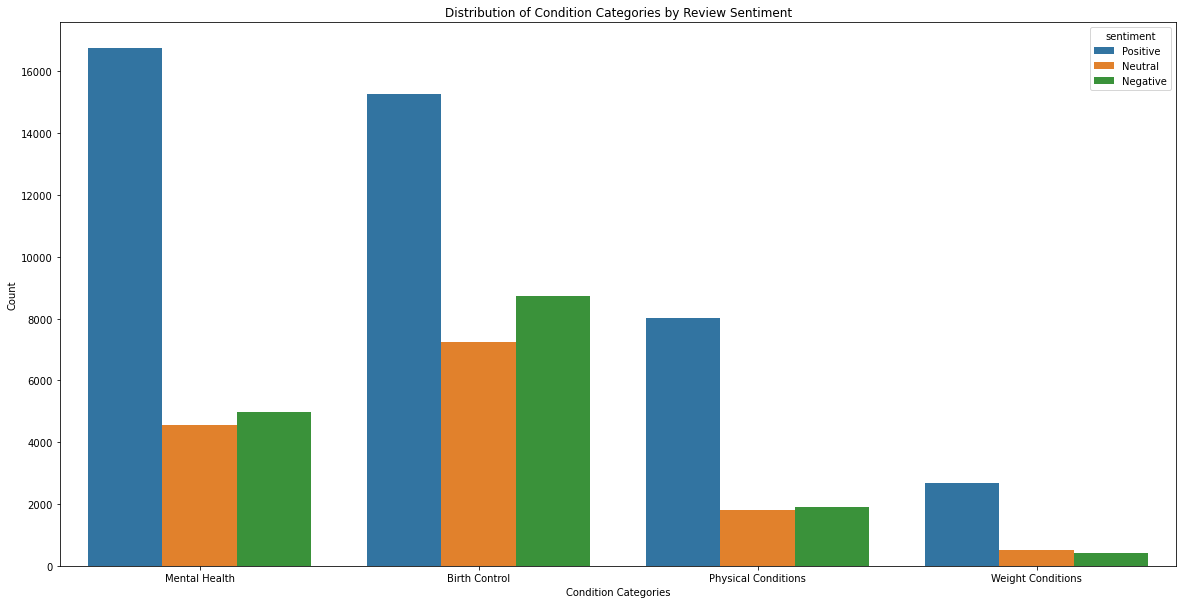

In [33]:
# Let's try plotting sentiment against groups

fig = plt.figure(figsize = (20, 10))

sns.countplot(x='groups', hue='sentiment', data=data_train, palette='tab10')
plt.xlabel('Condition Categories')
plt.ylabel('Count')
plt.title('Distribution of Condition Categories by Review Sentiment');

In [41]:
data_train['usefulCount'].value_counts(bins=3)

(-1.2919999999999998, 430.333]    72803
(430.333, 860.667]                   38
(860.667, 1291.0]                     5
Name: usefulCount, dtype: int64

In [24]:
data_train['usefulCount'].min()

0

In [25]:
data_train['usefulCount'].describe()

count    72846.000000
mean        25.667628
std         39.158719
min          0.000000
25%          4.000000
50%         12.000000
75%         31.000000
max       1291.000000
Name: usefulCount, dtype: float64